In [1]:
#Mount the Google Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/Sprint24/

/content/drive/MyDrive/Colab Notebooks/Sprint24


In [ ]:
# !unzip fra-eng.zip

Archive:  fra-eng.zip
  inflating: _about.txt              
  inflating: fra.txt                 


In [ ]:
# !unzip pretrained_model.zip

Archive:  pretrained_model.zip
  inflating: encoder-5-3000.pkl      
  inflating: decoder-5-3000.pkl      


In [ ]:
# !unzip pytorch-tutorial-master.zip

Archive:  pytorch-tutorial-master.zip
0500d3df5a2a8080ccfccbc00aca0eacc21818db
   creating: pytorch-tutorial-master/
 extracting: pytorch-tutorial-master/.gitignore  
  inflating: pytorch-tutorial-master/LICENSE  
  inflating: pytorch-tutorial-master/README.md  
   creating: pytorch-tutorial-master/logo/
  inflating: pytorch-tutorial-master/logo/pytorch_logo.png  
  inflating: pytorch-tutorial-master/logo/pytorch_logo_2018.svg  
   creating: pytorch-tutorial-master/tutorials/
   creating: pytorch-tutorial-master/tutorials/01-basics/
   creating: pytorch-tutorial-master/tutorials/01-basics/feedforward_neural_network/
  inflating: pytorch-tutorial-master/tutorials/01-basics/feedforward_neural_network/main.py  
   creating: pytorch-tutorial-master/tutorials/01-basics/linear_regression/
  inflating: pytorch-tutorial-master/tutorials/01-basics/linear_regression/main.py  
   creating: pytorch-tutorial-master/tutorials/01-basics/logistic_regression/
  inflating: pytorch-tutorial-master/tutori

In [16]:
!unzip vocap.zip

unzip:  cannot find or open vocap.zip, vocap.zip.zip or vocap.zip.ZIP.


In [4]:
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.1 MB 9.7 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 3.1 MB 42.4 MB/s 
     |████████████████████████████████| 488 kB 36.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires tensorboard~=2.6, but you have tensorboard 1.14.0 which is incompatible.
tensorflow 2.6.0 requires tensorflow-estimator~=2.6, but you have tensorflow-estimator 1.14.0 which is incompatible

In [5]:
!pip install keras==2.2.0

     |████████████████████████████████| 300 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras-applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.0 which is incompatible.
tensorflow 2.6.0 requires keras-preprocessing~=1.1.2, but you have keras-p

In [6]:
!pip install keras-applications==1.0.2

### 【問題1】機械翻訳の実行とコードリーディング
以下のサンプルコードは、短い英語からフランス語への変換を行うものです。これを動かしてください。<br>
　<a href="https://github.com/rstudio/keras/blob/master/vignettes/examples/lstm_seq2seq.py">keras/lstm_seq2seq.py at master · rstudio/keras</a><br>
その上でこのサンプルコードの各部分がどういった役割かを読み取り、まとめてください。以下のようにどこからどこの行が何をしているかを記述してください。<br>

In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks/Sprint24'

In [ ]:
%ls

_about.txt          fra.txt                      s2s.h5
decoder-5-3000.pkl  pretrained_model.zip         Sprint24.ipynb
encoder-5-3000.pkl  pytorch-tutorial-master/
fra-eng.zip         pytorch-tutorial-master.zip


In [ ]:
'''Sequence to sequence example in Keras (character-level).
This script demonstrates how to implement a basic character-level
sequence-to-sequence model. We apply it to translating
short English sentences into short French sentences,
character-by-character. Note that it is fairly unusual to
do character-level machine translation, as word-level
models are more common in this domain.
# Summary of the algorithm:
- We start with input sequences from a domain (e.g. English sentences)
    and correspding target sequences from another domain
    (e.g. French sentences).
- An encoder LSTM turns input sequences to 2 state vectors
    (we keep the last LSTM state and discard the outputs).
- A decoder LSTM is trained to turn the target sequences into
    the same sequence but offset by one timestep in the future,
    a training process called "teacher forcing" in this context.
    Is uses as initial state the state vectors from the encoder.
    Effectively, the decoder learns to generate `targets[t+1...]`
    given `targets[...t]`, conditioned on the input sequence.
- In inference mode, when we want to decode unknown input sequences, we:
    - Encode the input sequence into state vectors
    - Start with a target sequence of size 1
        (just the start-of-sequence character)
    - Feed the state vectors and 1-char target sequence
        to the decoder to produce predictions for the next character
    - Sample the next character using these predictions
        (we simply use argmax).
    - Append the sampled character to the target sequence
    - Repeat until we generate the end-of-sequence character or we
        hit the character limit.
# Data download:
English to French sentence pairs.
https://www.manythings.org/anki/fra-eng.zip
Lots of neat sentence pairs datasets can be found at:
https://www.manythings.org/anki/
# References:
- Sequence to Sequence Learning with Neural Networks
    https://arxiv.org/abs/1409.3215
- Learning Phrase Representations using
    RNN Encoder-Decoder for Statistical Machine Translation
    https://arxiv.org/abs/1406.1078
'''
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'fra.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
lines = open(data_path).read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, _ = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save('s2s.h5')

# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(100):
    # Take one sequence (part of the training test)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)


Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 92
Max sequence length for inputs: 15
Max sequence length for outputs: 59
Epoch 1/100
125/125 [==============================] - 8s 43ms/step - loss: 0.9710 - val_loss: 1.0762
Epoch 2/100
125/125 [==============================] - 4s 33ms/step - loss: 0.9059 - val_loss: 1.0097
Epoch 3/100
125/125 [==============================] - 4s 33ms/step - loss: 0.8567 - val_loss: 0.9575
Epoch 4/100
125/125 [==============================] - 4s 33ms/step - loss: 0.8174 - val_loss: 0.9363
Epoch 5/100
125/125 [==============================] - 4s 33ms/step - loss: 0.7889 - val_loss: 0.8908
Epoch 6/100
125/125 [==============================] - 4s 33ms/step - loss: 0.7629 - val_loss: 0.8715
Epoch 7/100
125/125 [==============================] - 4s 33ms/step - loss: 0.7415 - val_loss: 0.8369
Epoch 8/100
125/125 [==============================] - 4s 33ms/step - loss: 0.7217 - val_loss: 0.8407
Epoch 9/100
125/125

- 43～47行目：ライブラリのインポートなど
- 49～61行目：パイパーパラメータ、変数の初期化
- 62行目：ファイルオープン
- 63行目：オープンしたファイルを１行ずつ読み込む
- 65行目：読み込んだ１行分のデータをタブで区切り、変数へ代入
- 68行目：データの整形
- 69～70行目：配列へデータを代入
- 71行目～76行目：配列の要素数分ループさせ、変数へ加えていく
- 78行目～83行目：データの整形、変数への代入など
- 85行目～89行目：変数を表示
- 91行目～94行目：配列からデータを取り出し、辞書型として変数へ代入
- 96行目～104行目：ゼロ埋めして初期化
- 106行目～：２つの配列からzip関数を使用して同時にデータを取得し、要素分ループ
- 107行目～108行目：配列の要素数分ループし、変数の指定の位置へ１を代入
- 109行目～111行目：配列の要素数分ループし、変数の指定の位置へ１を代入
- 112行目～115行目：変数tが0より大きい場合、変数の指定の位置へ１を代入
- 117行目～120行目：入力シーケンスを定義して実行
- 121行目～122行目：encoder_outputを破棄し、状態を保持
- 124行目～125行目：初期状態としてencoder_statesを使用し、デコーダを設定
- 126行目～133行目：全ての出力シーケンスを返すようにデコーダを設定し、内部状態も返す。<br>
　　　　　　　　　　訓練モデルは使わないが、推論で使用する
- 135行目～137行目：モデルの定義
- 139行目～144行目：訓練モデルの学習
- 145行目～146行目：保存
- 148行目～168行目：推論モード<br>
　　　　　　　　　　1) 入力をエンコードし、デコーダの初期状態を取得<br>
　　　　　　　　　　2) この初期状態とシーケンスの開始トークンをターゲットとして実行<br>
　　　　　　　　　　3) 現在のターゲットトークンと現在の状態を繰り返す<br>
- 170行目～175行目：データを整形し、辞書型として代入
- 178行目～213行目：デコーダの定義
- 216行目～：訓練データから一つのシーケンスを取得し、デコードを実行


### 【問題2】イメージキャプショニングの学習済みモデルの実行
上記実装において 5. Test the model の項目を実行してください。また、自身で用意した画像に対しても文章を生成してください。これらに対してどういった文章が出力されたかを記録して提出してください。<br>

In [7]:
%cd pytorch-tutorial-master/tutorials/03-advanced/image_captioning/

/content/drive/My Drive/Colab Notebooks/Sprint24/pytorch-tutorial-master/tutorials/03-advanced/image_captioning


In [8]:
!pip install -r requirements.txt

In [9]:
!pip install torchvision

In [10]:
!pip install pycocotools

In [ ]:
# !sh download.sh

In [11]:
import torch
import torchvision
from IPython.display import Image,display_png


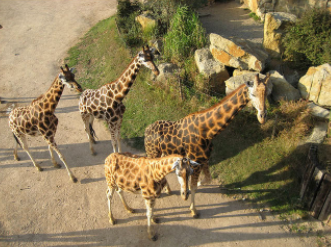

In [12]:
display_png(Image('png/example.png'))


In [17]:
!python sample.py --image="png/example.png"


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100% 230M/230M [00:02<00:00, 96.9MB/s]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<start> a group of giraffes standing next to each other . <end>


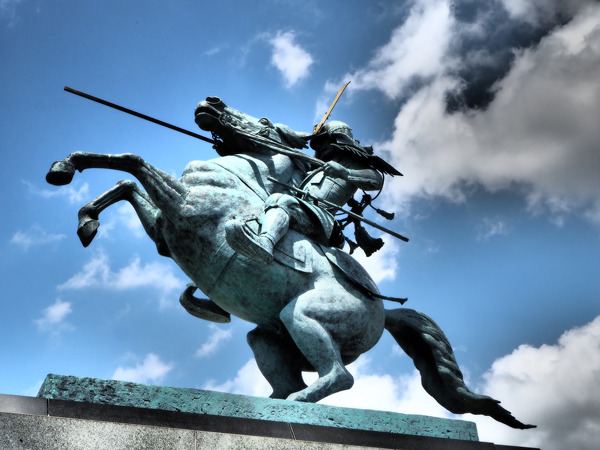

In [21]:
from PIL import Image
Image.open('png/picture_00.jpg')


In [22]:
!python sample.py --image="png/example.png"

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<start> a group of giraffes standing next to each other . <end>


### 【問題3】Kerasで動かしたい場合はどうするかを調査

「Pytorch_to_keras」を使う